# Nonlinear Classification
### Kyle McLester

In [1]:
from copy import deepcopy as copy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from IPython.core.debugger import set_trace

%matplotlib inline

In [2]:
names=["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]
abalone_df = pd.read_csv("datasets/abalone.data", names=names)
abalone_df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


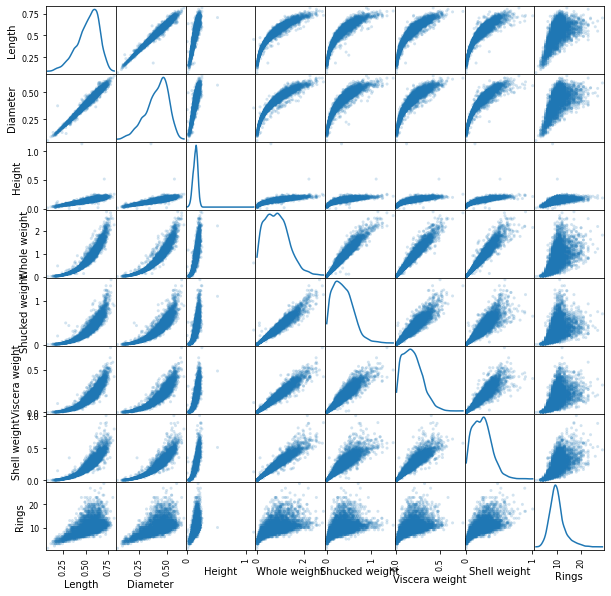

In [3]:
from pandas.plotting import scatter_matrix

scatter_matrix(abalone_df, alpha=0.2, figsize=(10,10), diagonal='kde');

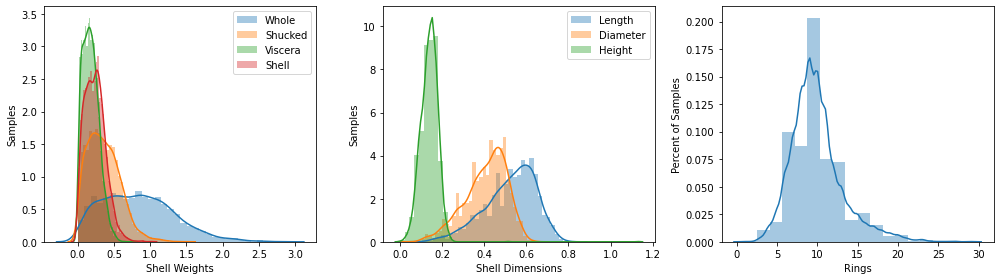

In [4]:
# codes from https://charlesreid1.github.io/circe/Abalone%20-%20Exploring%20the%20Data.html
fig = plt.figure(figsize=(14,4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

# Plot weight information
sns.distplot(abalone_df['Whole weight'],   label='Whole',   ax=ax1)
sns.distplot(abalone_df['Shucked weight'], label='Shucked', ax=ax1)
sns.distplot(abalone_df['Viscera weight'], label='Viscera', ax=ax1)
sns.distplot(abalone_df['Shell weight'],   label='Shell',   ax=ax1)
ax1.legend()
ax1.set(xlabel='Shell Weights', ylabel='Samples')

# Plot dimension information
sns.distplot(abalone_df['Length'],   label='Length', ax=ax2)
sns.distplot(abalone_df['Diameter'], label='Diameter', ax=ax2)
sns.distplot(abalone_df['Height'],   label='Height', ax=ax2)
ax2.legend()
ax2.set(xlabel='Shell Dimensions', ylabel='Samples')

# Plot system response
sns.distplot(abalone_df['Rings'], bins=18, ax=ax3)
ax3.set(ylabel='Percent of Samples')
plt.tight_layout()

In [5]:
np.sort(abalone_df['Rings'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29], dtype=int64)

In [6]:
abalone_df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

In [7]:
more_than_100_samples = abalone_df['Rings'].value_counts() > 100
abalone_df['Rings'].value_counts()[more_than_100_samples]

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
Name: Rings, dtype: int64

In [8]:
X = abalone_df.iloc[:, 1:].copy()
T = abalone_df[['Sex']].copy()

In [10]:
X

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [11]:
T

,Sex
0,M
1,M
2,F
3,M
4,I
...,...
4172,F
4173,M
4174,M
4175,F


In [12]:
Ti = pd.get_dummies(T['Sex'])
Ti

,F,I,M
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
...,...,...,...
4172,1,0,0
4173,0,0,1
4174,0,0,1
4175,1,0,0


In [13]:
import partitionlib as ptl
import importlib
import partitionlib
importlib.reload(partitionlib);

In [14]:
def partition_data(X, T):
    """Partition data into train and test splits."""
    data, targets = ptl.partition(copy(X.values), copy(T.values))
    Xtrain, Xtest = data
    Ttrain, Ttest = targets
    return Xtrain, Xtest, Ttrain, Ttest

In [15]:
Xtrain, Xtest, Ttrain, Ttest = partition_data(X, Ti)
print("Train data shape: {}".format(Xtrain.shape))
print("Train target shape: {}".format(Ttrain.shape))
print("Test data shape: {}".format(Xtest.shape))
print("Test target shape: {}".format(Ttest.shape))

Train data shape: (3342, 8)
Train target shape: (3342, 3)
Test data shape: (835, 8)
Test target shape: (835, 3)


In [16]:
N, D = X.shape
Ntrain, Ntest = Xtrain.shape[0], Xtest.shape[0]
print("Number of total samples: {}".format(N))
print("Number of total features: {}".format(D))
print("Number of training samples: {}".format(Ntrain))
print("Number of testing samples: {}".format(Ntest))

Number of total samples: 4177
Number of total features: 8
Number of training samples: 3342
Number of testing samples: 835


In [18]:
def standardize(X, mean, std):

    return (X-mean)/std

mean = np.mean(Xtrain, axis=0)

std = np.std(Xtrain, axis=0)

In [19]:
XtrainS = standardize(Xtrain, mean, std)
XtestS = standardize(Xtest, mean, std)

In [20]:
pd.DataFrame(XtrainS).describe()

,0,1,2,3,4,5,6,7
count,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03
mean,-2.732703e-16,-1.094656e-14,1.265857e-14,-1.630918e-15,2.091551e-16,5.961054e-16,-1.471195e-15,-5.348471e-17
std,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00
min,-3.744287e+00,-3.564023e+00,-3.275654e+00,-1.688914e+00,-1.616940e+00,-1.642968e+00,-1.705204e+00,-2.761258e+00
25%,-6.100521e-01,-5.882615e-01,-5.807048e-01,-7.773239e-01,-7.718525e-01,-7.853785e-01,-7.614916e-01,-6.053701e-01
50%,1.292526e-01,1.682881e-01,5.153873e-03,-6.995074e-02,-1.081772e-01,-1.024836e-01,-7.158104e-02,1.059789e-02
75%,7.540171e-01,7.230912e-01,5.910125e-01,6.496449e-01,6.473308e-01,6.393989e-01,6.433522e-01,3.185819e-01
max,2.295103e+00,2.236190e+00,2.320516e+01,4.062759e+00,5.085166e+00,5.249507e+00,5.469152e+00,5.862294e+00


In [21]:
def softmax(z):
    if not isinstance(z, np.ndarray):
        z = np.asarray(z)

    numerator = np.exp(z)

    if len(z.shape) == 2:
        denominator = np.sum(np.exp(z), axis=1, keepdims=True)
    else:
        denominator = np.sum(np.exp(z))

    return numerator / denominator

# Wrapper for softmax
def g(X, w):

    return softmax(X @ w) 

# add ones' column for bias
def addOnes(A):
    return np.insert(A, 0, 1, axis=1)


# linear logistic regression train functio
def llr_train(Xtrain, Titrain, **params): 
    
    # Set shape parameters
    Ntrain, D = Xtrain.shape
    Ntest = Xtest.shape[0]
    K = Titrain.shape[1]

    # initialize the weight matrix
    w = np.random.rand(D+1, K)
    
    # iterate to update weights
    niter = params.pop('niter', 1000)
    alpha = params.pop('alpha', 0.1)

    # Add bias to data
    X1train = addOnes(Xtrain)

    likeli = []
    for step in range(niter):

        ys = g(X1train, w)

        w += alpha * X1train.T @ (Titrain - ys)

    return w

# linear logistic regression test function
def llr_test(Xtest):
    # Add bias to test data
    X1test = addOnes(Xtest)
    # Get class probabilities for each sample in X1test
    return g(X1test, w)

In [22]:
w = llr_train(XtrainS, Ttrain, alpha=0.001)
w

array([[-0.68189189,  0.13710968,  1.28224308],
       [ 0.17281643,  1.33375976, -0.59492218],
       [ 2.23600571, -1.00448453,  0.96025421],
       [ 1.26623671, -0.0882917 ,  0.77065689],
       [ 1.33227553, -0.70003096,  0.8427658 ],
       [-0.49554249,  1.1305    ,  1.47437064],
       [ 1.52019182, -0.90531214,  0.87000427],
       [-0.22952232,  1.31832893,  0.01778658],
       [ 0.94693049, -0.21089971,  0.78557441]])

In [23]:
Ytrain = llr_test(XtrainS)
Ytrain

array([[2.16566424e-01, 3.64559085e-02, 7.46977668e-01],
       [1.61805777e-01, 2.36761610e-02, 8.14518062e-01],
       [9.54528134e-02, 2.42128309e-01, 6.62418878e-01],
       ...,
       [8.68257209e-05, 9.90088082e-01, 9.82509231e-03],
       [1.17979499e-04, 9.83071759e-01, 1.68102618e-02],
       [2.20183866e-03, 9.54923812e-01, 4.28743497e-02]])

In [24]:
Ytest = llr_test(XtestS)
Ytest

array([[4.34968484e-04, 9.70257955e-01, 2.93070769e-02],
       [5.01175390e-01, 2.31550125e-03, 4.96509109e-01],
       [2.95684097e-04, 9.74949776e-01, 2.47545402e-02],
       ...,
       [1.69427600e-05, 9.94762246e-01, 5.22081138e-03],
       [4.38622417e-01, 5.90792207e-03, 5.55469661e-01],
       [7.82446984e-04, 9.63766023e-01, 3.54515305e-02]])

In [25]:
Ltrain_llr = np.argmax(Ytrain, axis=1)
Ltest_llr = np.argmax(Ytest, axis=1)

In [26]:
def plot_result(Y, T, title=None):
    # plot in sorted order
    sorted_i = np.argsort(T)

    plt.figure(figsize=[5,5])
    plt.plot(Y[sorted_i], 'b.', label="prediction")
    plt.plot(T[sorted_i], 'r-', label="target")
    plt.legend()
    plt.ylabel("Rings")
    plt.xlabel("Samples")
    plt.ylim([-1,4])
    plt.title(title)
    
    # accuracy
    print("Acc: {} %".format(100 * np.sum(Y==T)/T.shape[0]))

Acc: 55.32615200478755 %


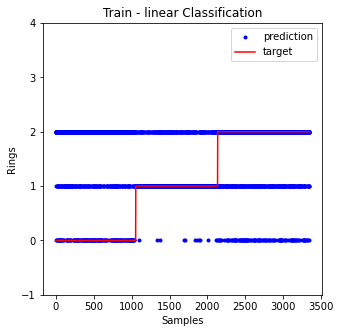

In [27]:
TtrainL = np.argmax(Ttrain, axis=1)

plot_result(Ltrain_llr, TtrainL, title="Train - linear Classification")

Acc: 57.24550898203593 %


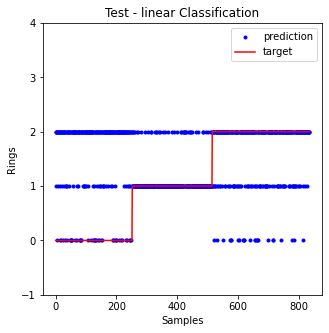

In [28]:
# Test results 
TtestL = np.argmax(Ttest, axis=1)

plot_result(Ltest_llr, TtestL, title="Test - linear Classification")

In [29]:
# Compute negative log loss (minimize negative log likelihood)
def cross_entropy_loss (Y, T):
    loss_vector = T * -np.log(Y)
    total_loss =  np.sum(loss_vector)
    return total_loss

In [30]:
def predict(Xs, V, W):
    X1 = addOnes(Xs)
    Z = np.tanh(X1 @ V)
    Z1 = addOnes(Z)
    Y = g(Z1, W)
    return Y, np.argmax(Y, axis=1), X1, Z1

In [31]:
# Now, set the number of outputs, K
K = Ttrain.shape[1] if len(Ttrain.shape) == 2 else 1

# Set parameters of neural network
hidden_units = 10
rho_v = 0.001
rho_w = 0.001

# Determine how many steepest descent steps to take when searching the mean-squared-error loss space
steps = 5000

###########################################################################
# Initialize weights to uniformly distributed values between small normally-distributed between -0.1 and 0.1
V = 0.1*2*(np.random.uniform(size=(D+1,hidden_units))-0.5)
W = 0.1*2*(np.random.uniform(size=(1+hidden_units,K))-0.5)

###########################################################################
# collect training and testing errors for plotting
errorTrace = np.zeros((steps,2))

fig = plt.figure(figsize=(10,8))
for s in range(steps):
    # Forward pass
    Ytrain, YtrL, X1, Z1 = predict(XtrainS, V, W)
    Z = Z1[:, 1:] # Remove bias from Z1

    # Error in output
    error = Ttrain - Ytrain

    # Backward pass - the backpropagation and weight update steps

    V = V + rho_v * X1.T @ ( ( error @ W[1:,:].T) * (1-Z**2))
 
    W = W + rho_w * Z1.T @ error        

    # error traces for plotting
    errorTrace[s,0] = cross_entropy_loss(Ytrain, Ttrain) 
    Ytest, YteL, _, _ =  predict(XtestS, V, W)
    errorTrace[s,1] = cross_entropy_loss(Ytest, Ttest)

print("Done!")    

Done!


<Figure size 720x576 with 0 Axes>

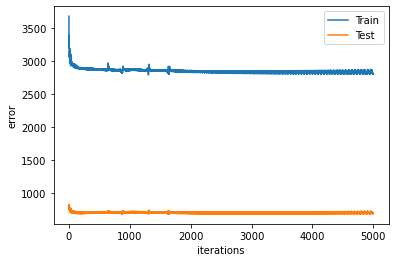

In [32]:
plt.plot(errorTrace)
plt.legend(('Train','Test'))
plt.xlabel("iterations")
plt.ylabel("error");

In [33]:
_, Ltrain_nn, _, _ = predict(XtrainS, V, W)
_, Ltest_nn, _, _ = predict(XtestS, V, W)

Acc: 56.07420706163974 %


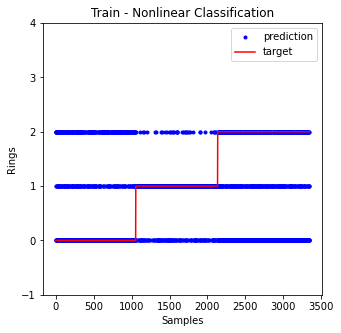

In [34]:
plot_result(Ltrain_nn, TtrainL, title="Train - Nonlinear Classification")

Acc: 56.52694610778443 %


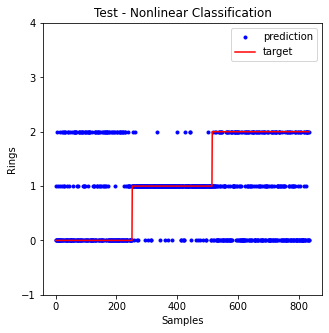

In [35]:
plot_result(Ltest_nn, TtestL, title="Test - Nonlinear Classification")

Acc: 57.24550898203593 %


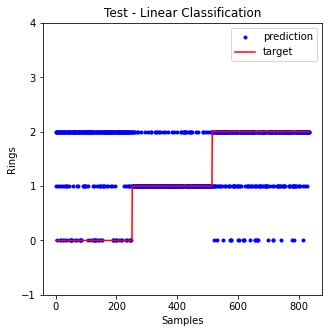

In [36]:
plot_result(Ltest_llr, TtestL, title="Test - Linear Classification")

Acc: 56.52694610778443 %


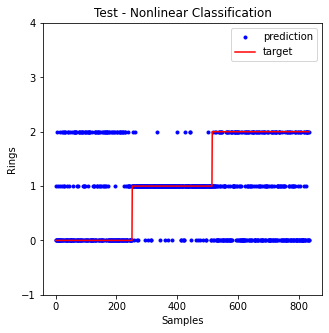

In [37]:
plot_result(Ltest_nn, TtestL, title="Test - Nonlinear Classification")